In [10]:
from sklearn.manifold import TSNE
import yaml
import matplotlib.pyplot as plt
import numpy as np
import sys
import os

sys.path.append(os.path.abspath('..'))
from prompt import PromptEngine

In [11]:
# from BCEmbedding import EmbeddingModel
from langchain_community.embeddings import HuggingFaceEmbeddings
sentences = ['python 是什么', '请介绍一下 python']
# model = EmbeddingModel(model_name_or_path="maidalun1020/bce-embedding-base_v1")
model = HuggingFaceEmbeddings(model_name='maidalun1020/bce-embedding-base_v1')

/data/zhelonghuang/miniconda3/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/data/zhelonghuang/miniconda3/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [12]:
embeddings = model.embed_documents(sentences)

In [13]:
engine = PromptEngine('../config/story.yml')

sentences = []
labels = []
for story in engine.stories:
    sentences.append(story.message)
    labels.append(engine.intent2id[story.intent])
sentences, labels

(['请问 property.json 如何配置？',
  '我的自动补全无法使用，是不是有bug？',
  '帮我上传一下这份数据',
  'surface了解一下？',
  '大佬们，为啥我的digital ide启动之后所有功能都没启动捏？我配置了property文件，然后插件的vivado路经和modelsim路经都加上了',
  '这群要被chisel夺舍了吗',
  'Metals一开直接报错',
  '话说digital-ide打开大的verilog卡死了',
  '请问一下，第一次点击对文件仿真可以出波形文件，再次点击的时候就会提示unknown module type了。是哪个配置没配置好？',
  '怎么调整是哪个版本的vivado来构建工程呢',
  '咱们这个插件win7的vscode是不是只能用很早之前的版本',
  '帮我将这份数据保存到服务器上',
  '他这个意思是 单个功耗很低 但是功耗低那肯定性能就寄 频率肯定不高 靠人多'],
 [1, 2, 3, 4, 1, 4, 4, 2, 1, 1, 1, 3, 4])

In [14]:
embedding = model.embed_documents(sentences)
embedding = np.array(embedding)
embedding.shape

(13, 768)

In [15]:
tsne = TSNE(n_components=2, perplexity=3)
plots = tsne.fit_transform(embedding)

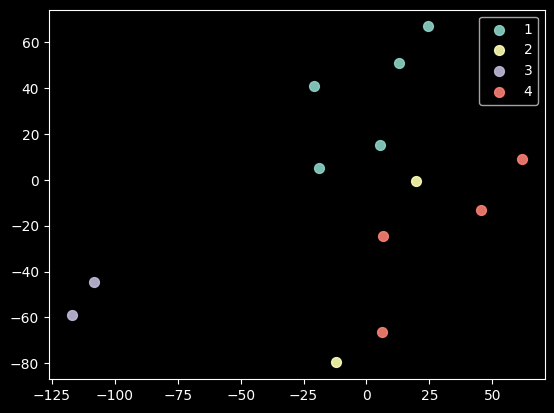

In [16]:
labels = np.array(labels)
for label in set(labels):
    mask = labels == label
    cor_plots = plots[mask]
    plt.scatter(cor_plots[:, 0], cor_plots[:, 1], s=50, alpha=0.9, label=label)
plt.legend()

In [17]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(embedding, labels)

LogisticRegression()

In [18]:
test_sentence = ['咖啡喝不了，喝了胃不舒服']
test_embedding = model.embed_documents(test_sentence)
log_model.predict(test_embedding)

array([4])

In [19]:
import joblib
joblib.dump(log_model, '../embedding_mapping.sklearn')

['../embedding_mapping.sklearn']

In [20]:
log_model = joblib.load('../model/embedding_mapping.sklearn')

In [21]:
test_sentence = ['咖啡喝不了，喝了胃不舒服']
test_embedding = model.embed_documents(test_sentence)
log_model.predict(test_embedding)

array([4])